# ---------------PHARMA & CHEMICAL COMPANIES IN GERMANY-----------------

**Add search links (google, fb, insta, linkedin)**

In [1]:
import pandas as pd

# Load the Excel file
file_path = "Merged_Data.xlsx"  # Replace with your actual file path
xls = pd.ExcelFile(file_path)

# Load the first sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Function to generate Google search links
def generate_search_links(company_name, domain):
    base_url = "https://www.google.com/search?q="
    google_search = f"{base_url}site:{domain}" if pd.notna(domain) else f"{base_url}{company_name}"
    fb_search = f"{base_url}site:facebook.com {company_name}"
    insta_search = f"{base_url}site:instagram.com {company_name}"
    linkedin_search = f"{base_url}site:linkedin.com {company_name}"
    
    return google_search, fb_search, insta_search, linkedin_search

# Apply function to generate search links
search_links = df.apply(lambda row: generate_search_links(row['Company_name'], row.get('Domain', '')), axis=1)

# Add results to DataFrame
df[['Google_Search', 'Facebook_Search', 'Instagram_Search', 'LinkedIn_Search']] = pd.DataFrame(search_links.tolist())

# Save the updated DataFrame to a new Excel file
# output_file_path = "Merged_Data_Search_Links.xlsx"
# df.to_excel(output_file_path, index=False)

print(f"Updated file saved as {output_file_path}")


Updated file saved as Merged_Data_Search_Links.xlsx


In [4]:
import pandas as pd
import re

def clean_data(file_path, output_path):
    # Load Excel file
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])
    
    # Clean column names (strip spaces and lowercase for uniformity)
    df.columns = df.columns.str.strip().str.lower()
    
    # Format phone numbers
    if "contact_no." in df.columns:
        df["contact_no."] = df["contact_no."].astype(str).str.replace(r'[^0-9+]', '', regex=True).str.replace(" ", "")
    
    # Extract email domains
    def extract_domain(email):
        return email.split("@")[1] if pd.notna(email) and "@" in str(email) else "Null"
    
    if "email" in df.columns:
        df["email_domain"] = df["email"].apply(extract_domain)
    
    # Convert follower counts to integers
    def convert_to_int(value):
        if pd.isna(value) or value in ["", "Null"]:
            return 0
        try:
            return int(float(value))
        except ValueError:
            return 0
    
    for col in ["insta_foll", "linkedin_foll", "fb_foll"]:
        if col in df.columns:
            df[col] = df[col].apply(convert_to_int)
    
    # Categorize Google ratings
    def categorize_rating(rating):
        rating = pd.to_numeric(rating, errors="coerce")
        if pd.isna(rating):
            return "No Rating"
        if rating >= 4.5:
            return "Excellent"
        elif rating >= 3.5:
            return "Good"
        elif rating > 0:
            return "Average"
        return "No Rating"
    
    if "google_rating" in df.columns:
        df["google_rating_category"] = df["google_rating"].apply(categorize_rating)
    
    # Save cleaned data
    df.to_excel(output_path, index=False)
    print(f"✅ Cleaned data saved to: {output_path}")

# Example usage
input_file = "Merged_Data.xlsx"  # Full file path
output_file = "Cleaned_Data.xlsx"  # Output file
clean_data(input_file, output_file)


✅ Cleaned data saved to: Cleaned_Data.xlsx


**Automation Process**

C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


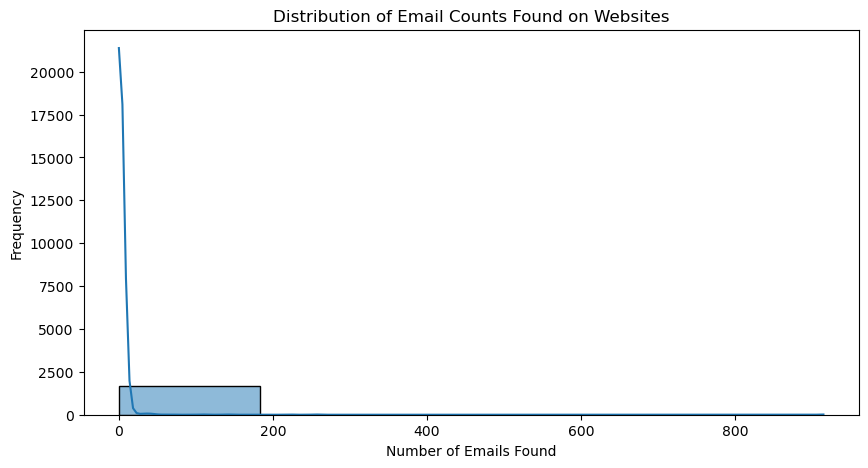

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "Cleaned_Data.xlsx"
df = pd.read_excel(file_path)

# Function to extract website content
def scrape_website(url):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            
            # Extract title
            title = soup.title.string if soup.title else "N/A"
            
            # Extract meta description
            meta_desc = soup.find("meta", attrs={"name": "description"})
            description = meta_desc["content"] if meta_desc else "N/A"
            
            # Extract emails
            emails = re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", response.text)
            
            # Extract phone numbers (basic pattern)
            phones = re.findall(r"\+?\d[\d -]{8,15}\d", response.text)
            
            return {
                "Website": url,
                "Title": title,
                "Description": description,
                "Emails": ", ".join(set(emails)),
                "Phones": ", ".join(set(phones))
            }
        else:
            return {"formatted_url": url, "Title": "N/A", "Description": "N/A", "Emails": "N/A", "Phones": "N/A"}
    except Exception as e:
        return {"formatted_url": url, "Title": "Error", "Description": "Error", "Emails": "Error", "Phones": "Error"}

# Apply scraping function
results = []
for website in df["formatted_url"]:  # Assuming "Website" column contains URLs
    results.append(scrape_website(website))

# Convert to DataFrame and save
scraped_df = pd.DataFrame(results)
scraped_df.to_csv("scraped_data.csv", index=False)

# Load the scraped data for visualization
scraped_df["Email Count"] = scraped_df["Emails"].apply(lambda x: len(x.split(", ")) if x != "N/A" else 0)

# Plot Email Counts
plt.figure(figsize=(10, 5))
sns.histplot(scraped_df["Email Count"], bins=5, kde=True)
plt.title("Distribution of Email Counts Found on Websites")
plt.xlabel("Number of Emails Found")
plt.ylabel("Frequency")
plt.show()


C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

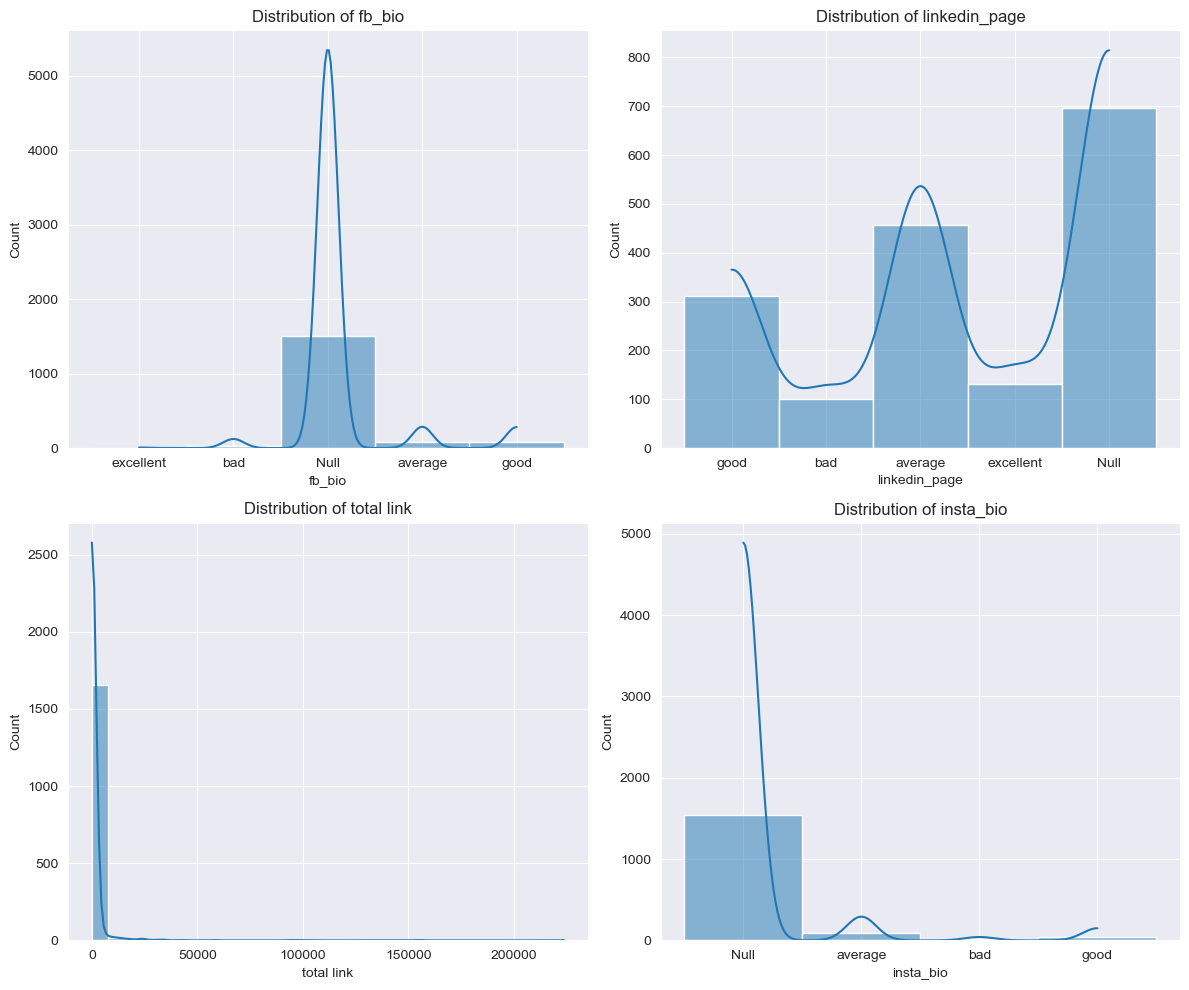

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("Cleaned_Data.xlsx", sheet_name="Sheet1")

# Selecting numerical columns for visualization
columns_to_plot = ["fb_bio", "linkedin_page", "total link", "insta_bio"]

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pranav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

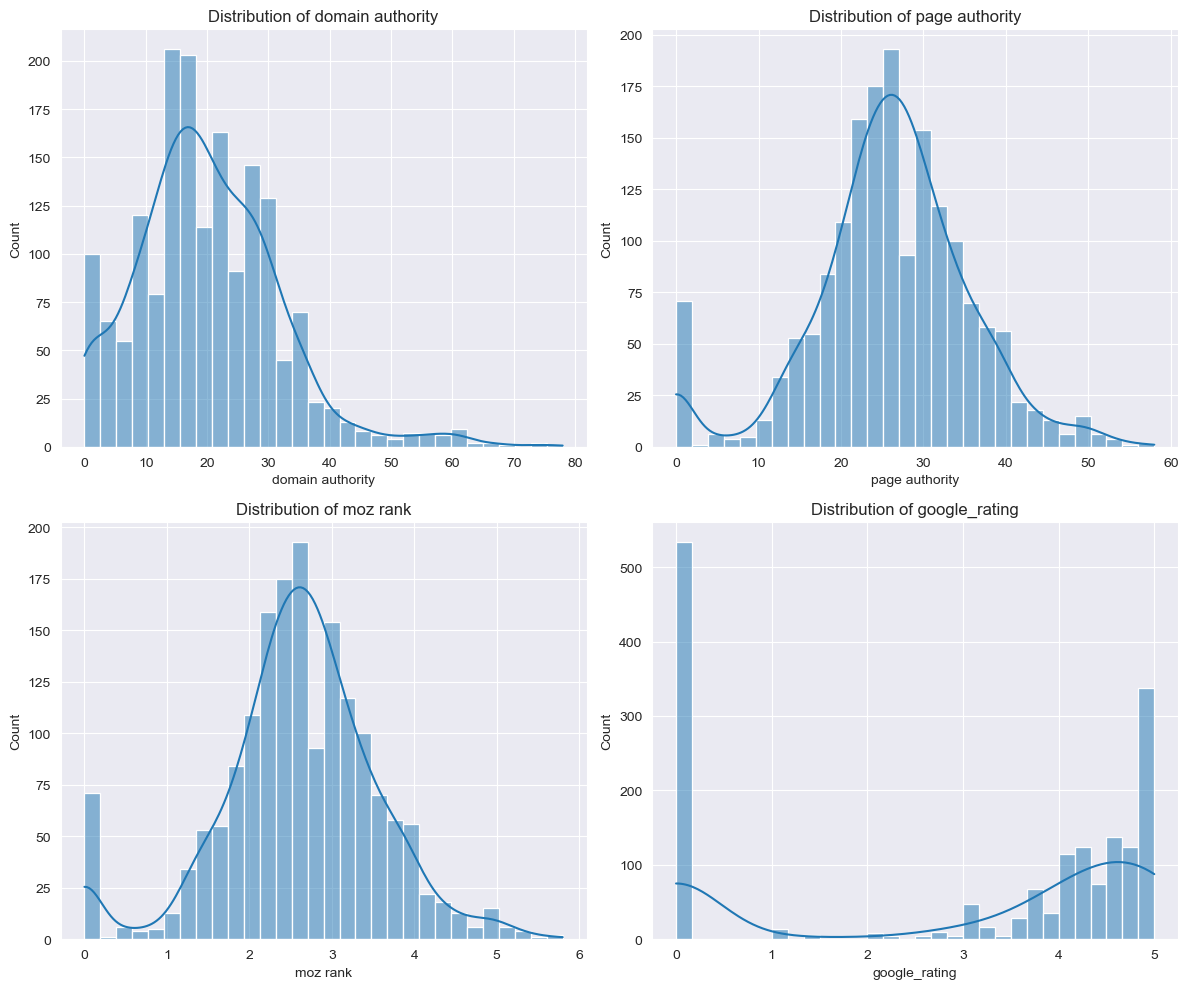

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("Cleaned_Data.xlsx", sheet_name="Sheet1")

# Selecting numerical columns for visualization
columns_to_plot = ["domain authority", "page authority", "moz rank", "google_rating"]

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

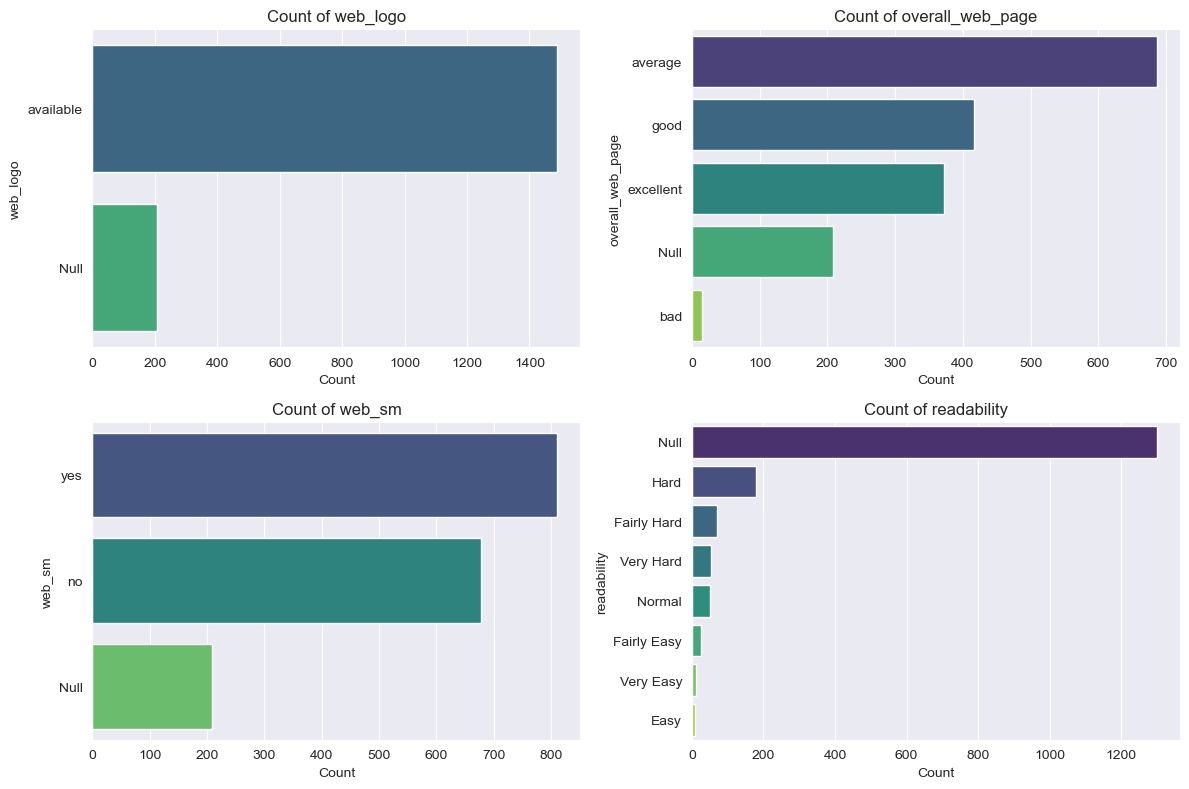

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("Cleaned_Data.xlsx", sheet_name="Sheet1")

# Bar plot for categorical columns
categorical_cols = ["web_logo", "overall_web_page", "web_sm", "readability"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Count of {col}')
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

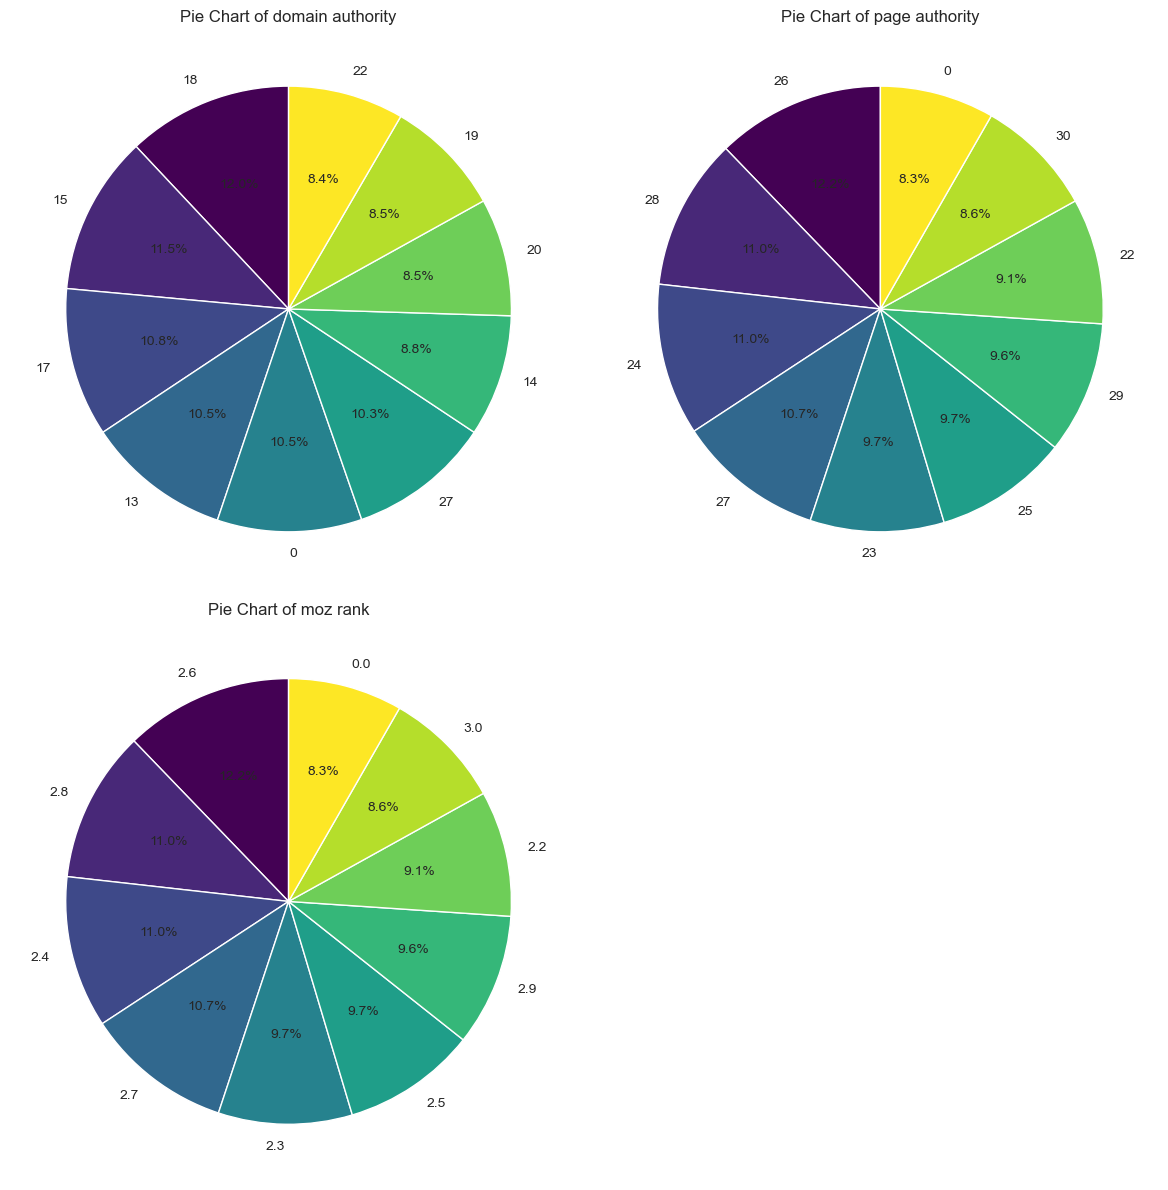

In [20]:
# Pie charts for selected columns
pie_cols = ["domain authority", "page authority", "moz rank"]
plt.figure(figsize=(12, 12))
for i, col in enumerate(pie_cols):
    plt.subplot(2, 2, i+1)
    df[col].value_counts().head(10).plot.pie(autopct="%1.1f%%", cmap="viridis", startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel("")
plt.tight_layout()
plt.show()